In [309]:
import json
import pathlib

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["font.size"] = 16

In [310]:
project_root = "minami373/lip2sp-base_hubert_2"
run_id_lst = [
    ["odv0emes", "5", "1.0"],
    ["60ys3all", "4", "1.0"],
    ["izo6mdh0", "3", "1.0"],
    ["ba09i1ew", "2", "1.0"],
    ["pecao4dn", "1", "1.0"],
    ["imh40eeh", "0", "1.0"],
    ["i1mczf2h", "5", "0.1"],
    ["nm1dclqz", "4", "0.1"],
    ["2dt6htxh", "3", "0.1"],
    ["imlwx94m", "2", "0.1"],
    ["vsfgac4w", "1", "0.1"],
    ["fzqmwx3z", "0", "0.1"],
    ["fkgqrn5h", "5", "0.01"],
    ["xyyd6rku", "4", "0.01"],
    ["i3ut85vl", "3", "0.01"],
    ["2x993ena", "2", "0.01"],
    ["sl31gibt", "1", "0.01"],
    ["k88qzr3b", "1", "0.01"],  # failed
    ["olk9j1yg", "0", "0.01"],
    ["4e8boifl", "5", "0.001"],
    ["fsnfvb38", "4", "0.001"],
    ["1o96778p", "3", "0.001"],
    ["ylxw0mcn", "2", "0.001"],
    ["h5jxjl2g", "1", "0.001"],
    ["6z9pifij", "0", "0.001"],
    ["65nwynxb", "5", "0.0001"],
    ["oujb8ts2", "4", "0.0001"],
    ["hnrlbas6", "3", "0.0001"],
    ["kspkyqbg", "2", "0.0001"],
    ["sh53o37y", "1", "0.0001"],
    ["awxiwjwt", "0", "0.0001"],
]

In [311]:
data_lst = []
for run_id, method_id, loss_weight in run_id_lst:
    path_lst = pathlib.Path(f"./results/{run_id}").glob("**/*.json")
    for path in path_lst:
        loss_name = path.stem.split("_table_")[0]

        if (method_id == "0" or method_id == "1") and loss_name not in [
            "mel_loss",
            "ssl_feature_cluster_loss",
            "total_loss",
        ]:
            continue
        if (method_id == "2" or method_id == "4") and loss_name not in [
            "mel_speech_ssl_loss",
            "ssl_feature_cluster_speech_ssl_loss",
            "total_loss",
        ]:
            continue
        if (method_id == "3" or method_id == "5") and loss_name not in [
            "mel_ensemble_loss",
            "ssl_feature_cluster_ensemble_loss",
            "total_loss",
        ]:
            continue

        if method_id == "2" or method_id == "4":
            if loss_name == "mel_speech_ssl_loss":
                loss_name = "mel_loss"
            elif loss_name == "ssl_feature_cluster_speech_ssl_loss":
                loss_name = "ssl_feature_cluster_loss"
        elif method_id == "3" or method_id == "5":
            if loss_name == "mel_ensemble_loss":
                loss_name = "mel_loss"
            elif loss_name == "ssl_feature_cluster_ensemble_loss":
                loss_name = "ssl_feature_cluster_loss"

        with open(str(path), "r") as f:
            data = json.load(f)["data"]

        for row in data:
            if run_id == "sl31gibt":
                row[0] += 12
                row += ["k88qzr3b", loss_name, method_id, loss_weight]
            else:
                row += [run_id, loss_name, method_id, loss_weight]
        data_lst += data

df = pl.DataFrame(
    data=data_lst,
    schema=[
        "epoch",
        "loss_type",
        "loss_value",
        "run_id",
        "loss_name",
        "method_id",
        "loss_weight",
    ],
    orient="row",
)
df = df.with_columns((pl.col("method_id") + "_" + pl.col("loss_weight")).alias("tag"))
df = df.filter(pl.col("method_id") != "1")
df

epoch,loss_type,loss_value,run_id,loss_name,method_id,loss_weight,tag
i64,str,f64,str,str,str,str,str
0,"""train loss""",8.792299,"""odv0emes""","""total_loss""","""5""","""1.0""","""5_1.0"""
1,"""train loss""",2.941954,"""odv0emes""","""total_loss""","""5""","""1.0""","""5_1.0"""
2,"""train loss""",1.889136,"""odv0emes""","""total_loss""","""5""","""1.0""","""5_1.0"""
3,"""train loss""",1.783392,"""odv0emes""","""total_loss""","""5""","""1.0""","""5_1.0"""
4,"""train loss""",1.721557,"""odv0emes""","""total_loss""","""5""","""1.0""","""5_1.0"""
…,…,…,…,…,…,…,…
45,"""validation loss""",0.632805,"""awxiwjwt""","""mel_loss""","""0""","""0.0001""","""0_0.0001"""
46,"""validation loss""",0.6338,"""awxiwjwt""","""mel_loss""","""0""","""0.0001""","""0_0.0001"""
47,"""validation loss""",0.632429,"""awxiwjwt""","""mel_loss""","""0""","""0.0001""","""0_0.0001"""


In [312]:
df_agg = (
    df.filter(pl.col("loss_name") == "total_loss")
    .sort(
        ["method_id", "loss_weight", "loss_type", "loss_name", "loss_value"],
        descending=True,
    )
    .group_by(["method_id", "loss_weight", "loss_type", "loss_name"])
    .tail(1)
    .sort(["method_id", "loss_weight", "loss_type", "loss_name", "loss_value"])
    .rename({"loss_value": "total_loss_value"})
    .join(
        other=df,
        on=["method_id", "loss_weight", "loss_type", "epoch", "run_id", "tag"],
        how="left",
        coalesce=True,
    )
    .drop(["loss_name", "total_loss_value", "run_id", "tag"])
    .rename({"loss_name_right": "loss_name"})
    .sort(["method_id", "loss_weight", "loss_type", "loss_name"])
    .filter((pl.col("loss_type") == "validation loss"))
)
df_agg

method_id,loss_weight,loss_type,epoch,loss_value,loss_name
str,str,str,i64,f64,str
"""0""","""0.0001""","""validation loss""",47,0.632429,"""mel_loss"""
"""0""","""0.0001""","""validation loss""",47,2.147304,"""ssl_feature_cluster_loss"""
"""0""","""0.0001""","""validation loss""",47,0.632644,"""total_loss"""
"""0""","""0.001""","""validation loss""",45,0.629231,"""mel_loss"""
"""0""","""0.001""","""validation loss""",45,2.049208,"""ssl_feature_cluster_loss"""
…,…,…,…,…,…
"""5""","""0.1""","""validation loss""",6,1.981183,"""ssl_feature_cluster_loss"""
"""5""","""0.1""","""validation loss""",6,0.831271,"""total_loss"""
"""5""","""1.0""","""validation loss""",16,0.63668,"""mel_loss"""


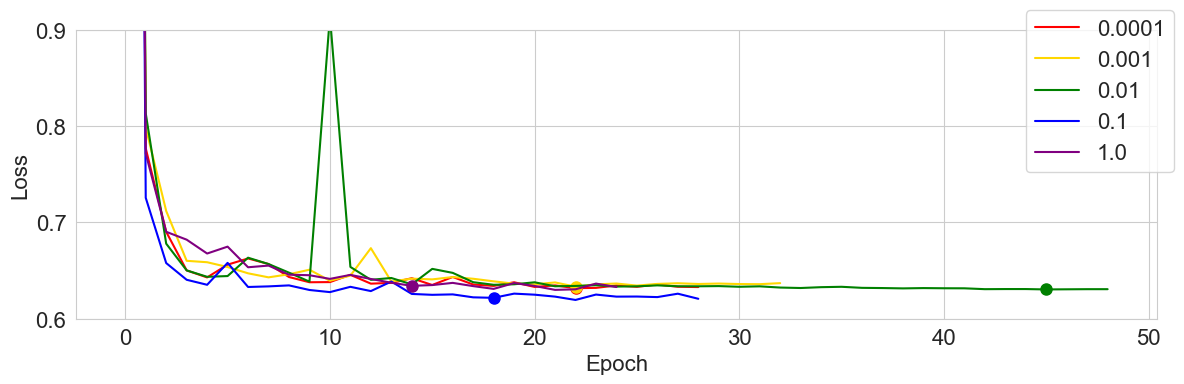

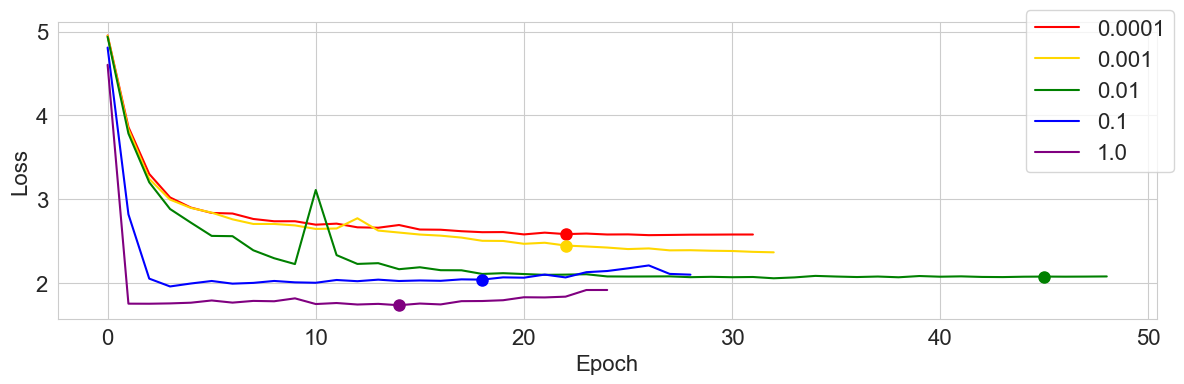

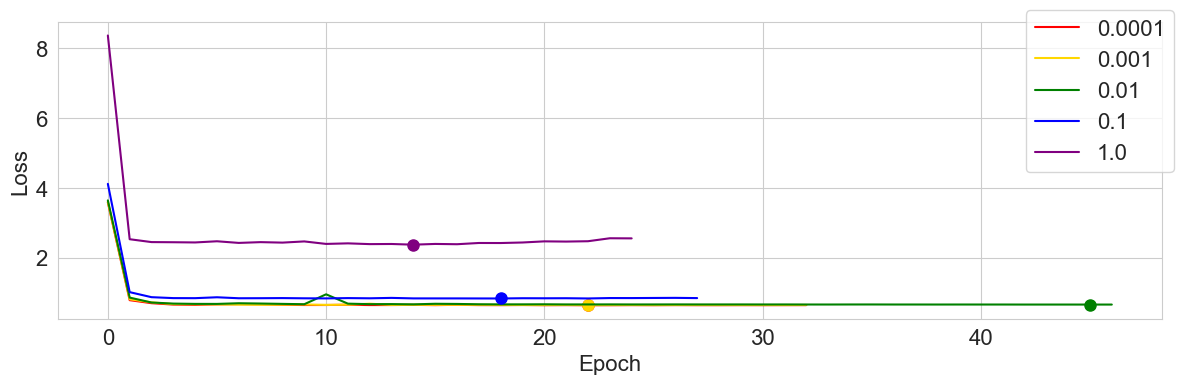

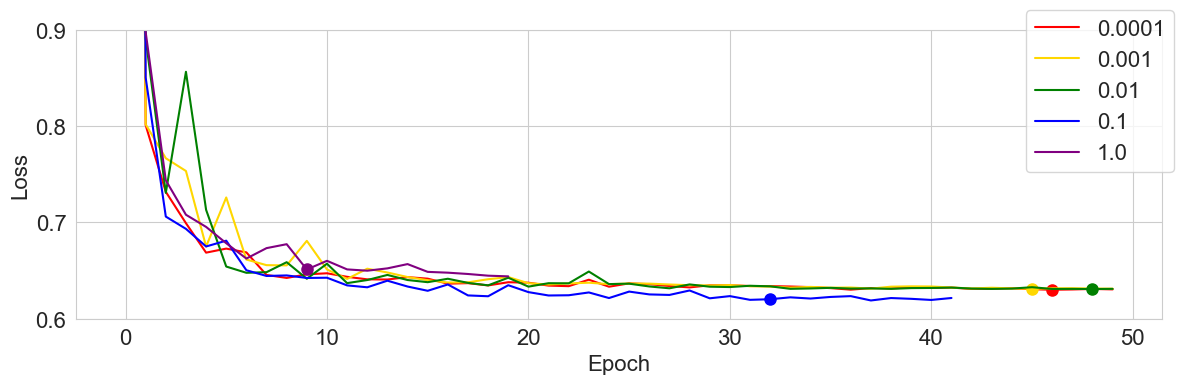

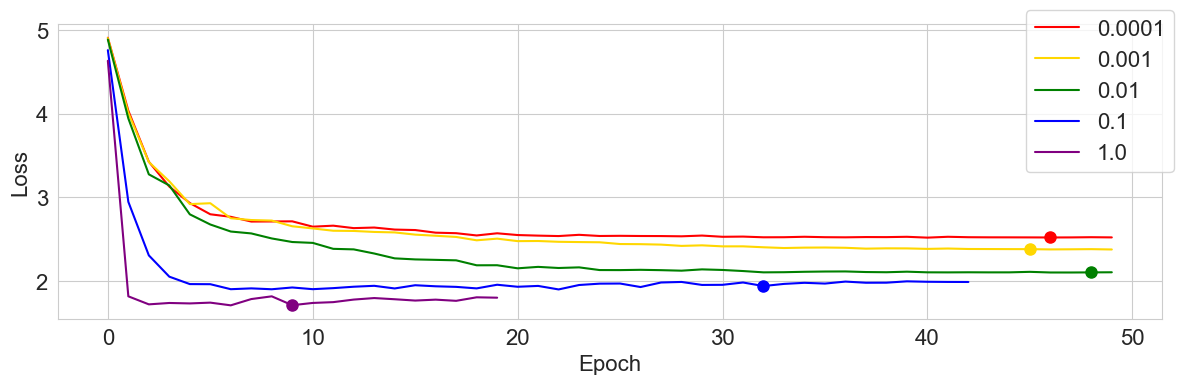

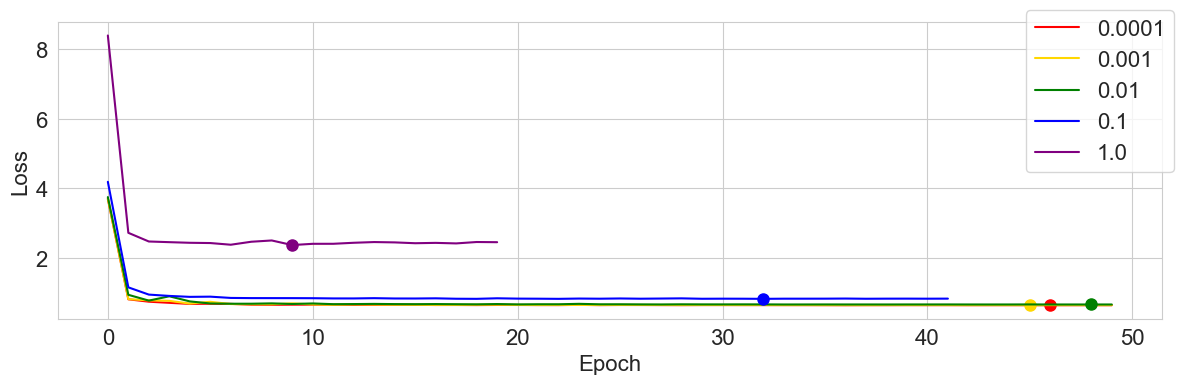

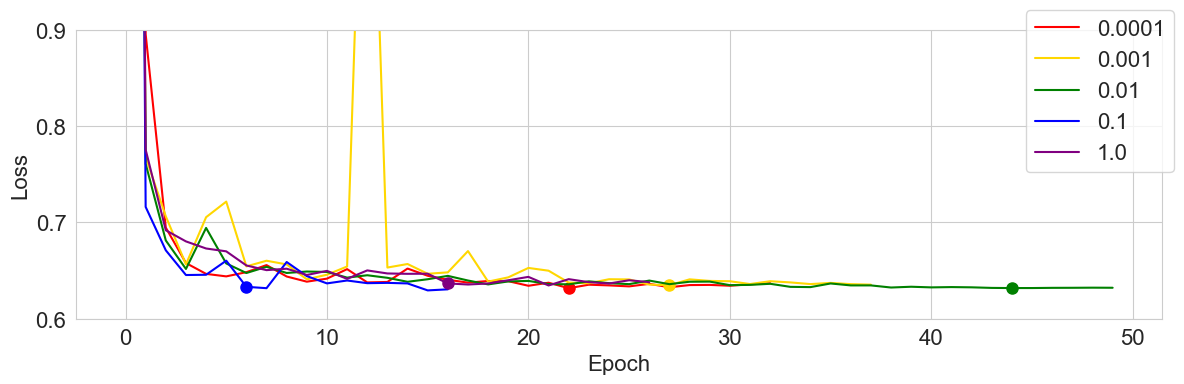

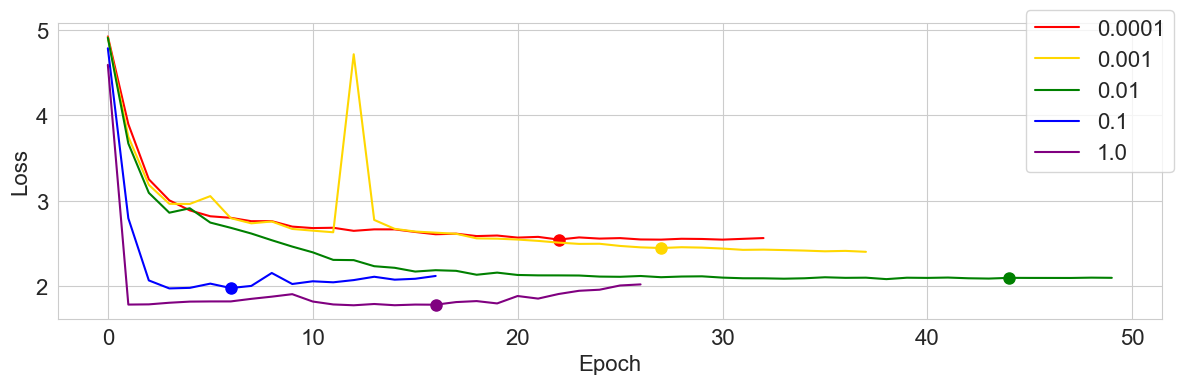

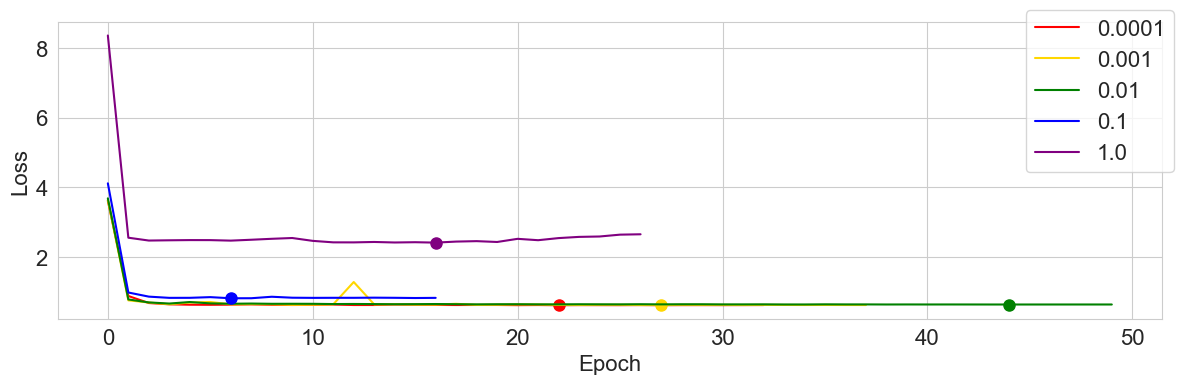

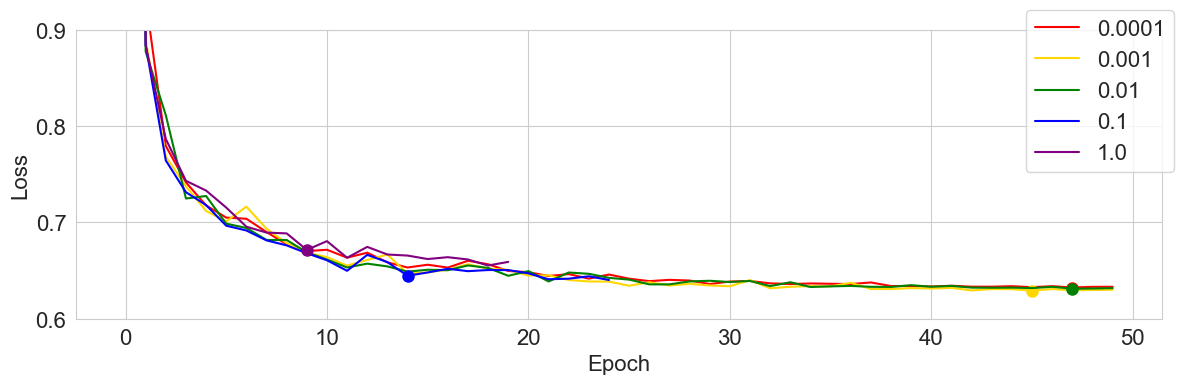

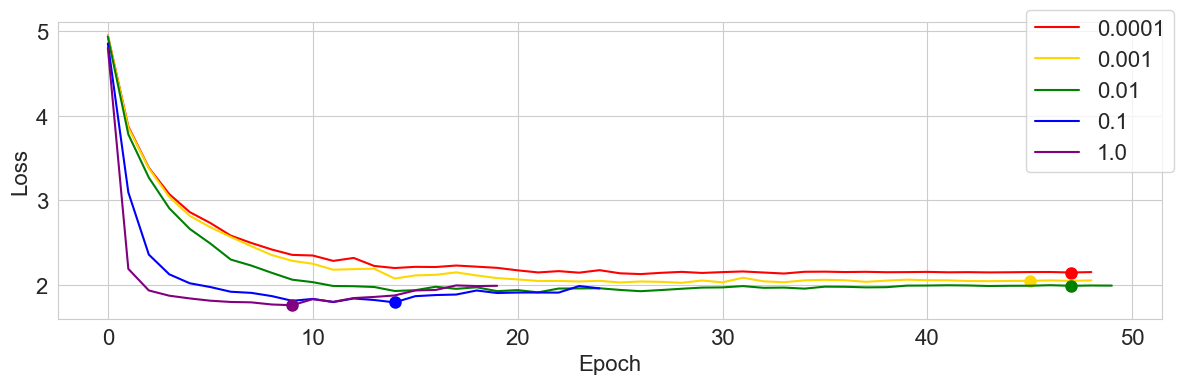

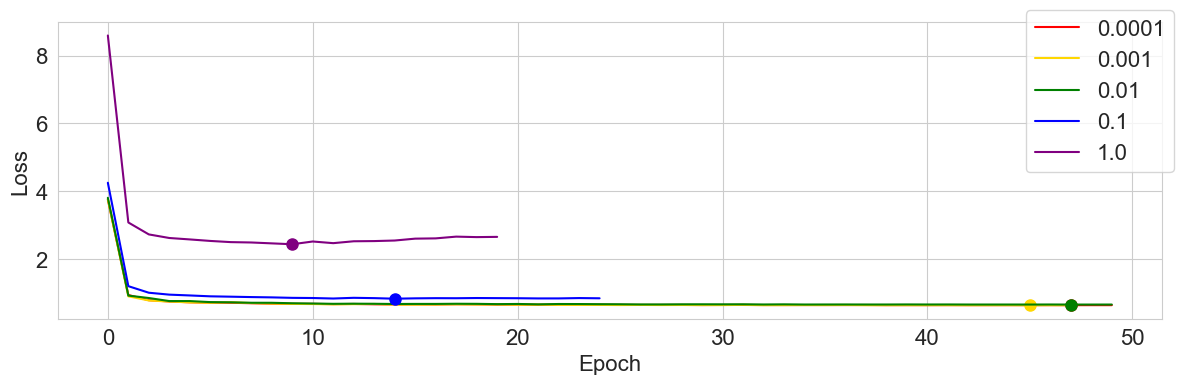

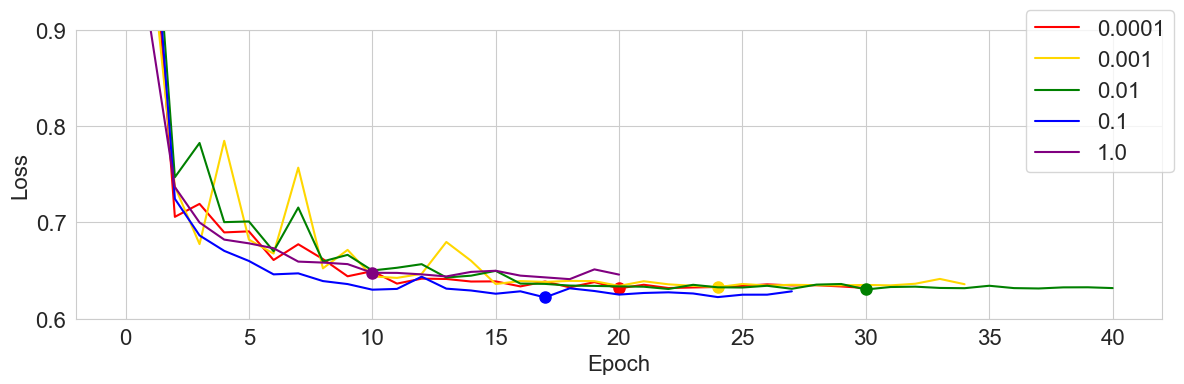

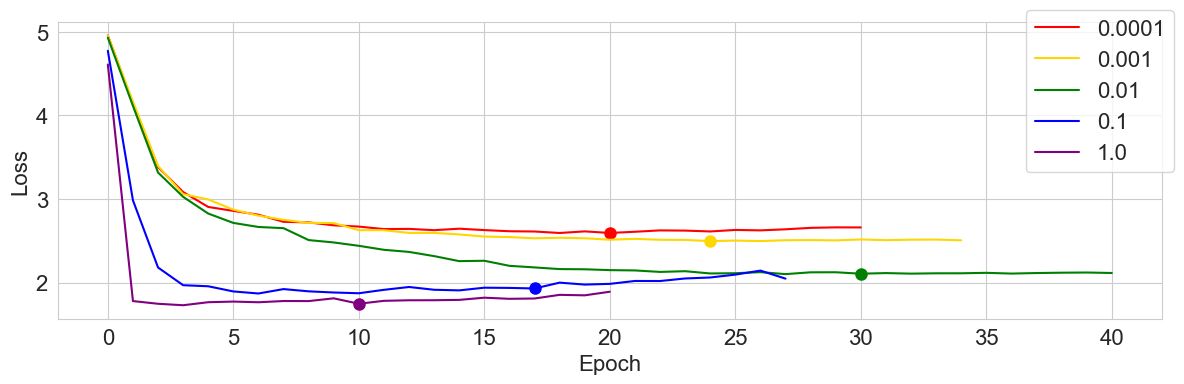

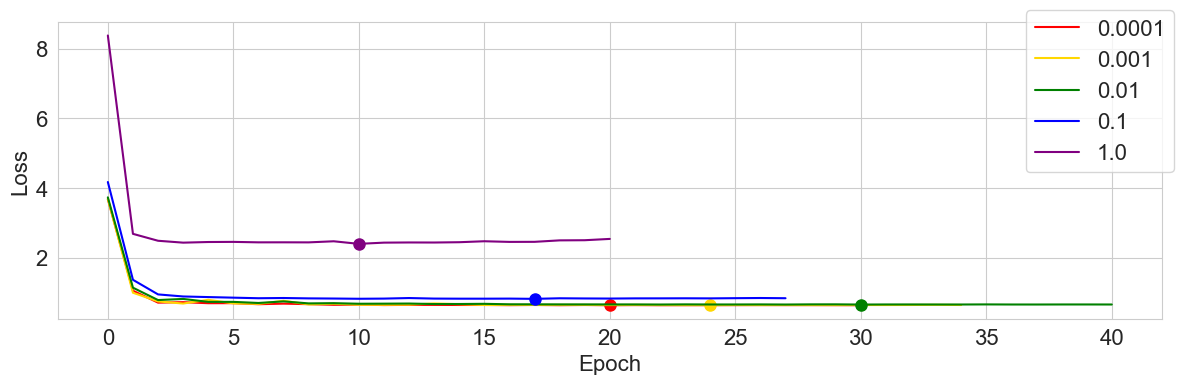

In [327]:
save_dir = pathlib.Path("./figs_2")
color_lst = ["red", "gold", "green", "blue", "purple"]
loss_name_lst = ["mel_loss", "ssl_feature_cluster_loss", "total_loss"]

for method_id in sorted(
    list(df.select(pl.col("method_id")).unique().to_numpy().reshape(-1))
):
    save_dir_method = save_dir / str(method_id)
    save_dir_method.mkdir(parents=True, exist_ok=True)

    for loss_name in loss_name_lst:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

        for loss_weight, color in zip(
            sorted(
                list(df.select(pl.col("loss_weight")).unique().to_numpy().reshape(-1))
            ),
            color_lst,
        ):
            data_val = df.filter(
                (pl.col("loss_name") == loss_name)
                & (pl.col("loss_type") == "validation loss")
                & (pl.col("method_id") == str(method_id))
                & (pl.col("loss_weight") == str(loss_weight))
            )
            ax.plot(
                data_val["epoch"],
                data_val["loss_value"],
                label=str(loss_weight),
                color=color,
            )

            min_val_loss = df_agg.filter(
                (pl.col("loss_name") == loss_name)
                & (pl.col("loss_type") == "validation loss")
                & (pl.col("method_id") == str(method_id))
                & (pl.col("loss_weight") == str(loss_weight))
            )
            ax.plot(
                min_val_loss["epoch"],
                min_val_loss["loss_value"],
                marker="o",
                color=color,
                markersize=8,
            )

            ax.set_xlabel("Epoch")
            ax.set_ylabel("Loss")

            if loss_name == "mel_loss":
                ax.set_ylim(0.6, 0.9)

        fig.legend()
        fig.tight_layout()

        save_path = save_dir / method_id / f"{loss_name}.png"
        save_path.parents[0].mkdir(exist_ok=True, parents=True)
        fig.savefig(str(save_path))

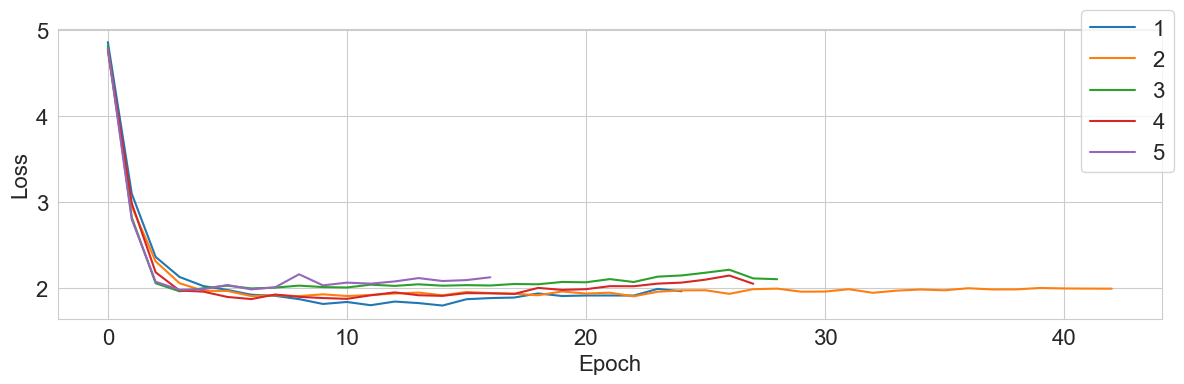

In [348]:
loss_weight = 0.1
loss_name = "ssl_feature_cluster_loss"

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

for method_id in sorted(
    list(df.select(pl.col("method_id")).unique().to_numpy().reshape(-1))
):
    data_val = df.filter(
        (pl.col("loss_name") == loss_name)
        & (pl.col("loss_type") == "validation loss")
        & (pl.col("method_id") == str(method_id))
        & (pl.col("loss_weight") == str(loss_weight))
    )
    loss_value = data_val["loss_value"].to_numpy().reshape(-1)
    epoch = data_val["epoch"].to_numpy().reshape(-1)
    if str(method_id) == "0":
        ax.plot(epoch, loss_value, label="1")
    else:
        ax.plot(epoch, loss_value, label=str(method_id))

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

fig.legend()
fig.tight_layout()

In [342]:
loss_value_prev = data_val["loss_value"].to_numpy().reshape(-1)[:-1]
loss_value_next = data_val["loss_value"].shift(-1).to_numpy().reshape(-1)[:-1]
loss_value_diff = loss_value_next - loss_value_prev
loss_value_diff

array([-1.98677512, -0.72591486, -0.09342341,  0.00645094,  0.04940405,
       -0.05138098,  0.02463067,  0.15122285, -0.12870759,  0.03173663,
       -0.01197822,  0.02591761,  0.03891706, -0.0339797 ,  0.01044903,
        0.03284936])